# Phase 1 Project

## Introduction

In this project, I aim to explore what types of films are currently doing best at the box office based on given datasets present in the ```./Data``` folder. My aim is to advise Microsoft on what types of movies they should create in their newly built movie studio.

## Exploring Datasets

In [1]:
! ls ./data/

bom.movie_gross.csv  rt.movie_info.tsv	tmdb.movies.csv
im.db		     rt.reviews.tsv	tn.movie_budgets.csv


In [2]:
import numpy as np
import pandas as pd
import sqlite3
from matplotlib import pyplot as plt

#### Imdb data

##### Box Office Mojo csv 

In [3]:
bom_df = pd.read_csv("./data/bom.movie_gross.csv")
bom_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [4]:
bom_df.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [5]:
bom_df.index

RangeIndex(start=0, stop=3387, step=1)

In [6]:
bom_df.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

##### Imdb database

In [7]:
conn = sqlite3.connect("./data/im.db")
db_tables_q = """
SELECT name
FROM sqlite_master
WHERE type = 'table'
;
"""
pd.read_sql(db_tables_q, conn)

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [8]:
movie_basics_q = """
SELECT *
FROM movie_basics
;
"""
imdb_movie_basics_df = pd.read_sql(movie_basics_q, conn)
imdb_movie_basics_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [9]:
imdb_movie_basics_df.index

RangeIndex(start=0, stop=146144, step=1)

In [10]:
imdb_movie_basics_df.isna().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [11]:
movie_ratings_q = """
SELECT *
FROM movie_ratings
;
"""
imdb_movie_ratings_df = pd.read_sql(movie_ratings_q, conn)
imdb_movie_ratings_df.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [12]:
imdb_movie_ratings_df.index

RangeIndex(start=0, stop=73856, step=1)

In [13]:
imdb_movie_ratings_df.isna().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

#### Rotten Tomatoes data

##### Movie Info tsv

In [14]:
rt_movie_info_df = pd.read_csv("./data/rt.movie_info.tsv", delimiter="\t")
rt_movie_info_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [15]:
rt_movie_info_df.index

RangeIndex(start=0, stop=1560, step=1)

In [16]:
rt_movie_info_df.isna().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

##### Movie reviews tsv

In [17]:
rt_reviews_df = pd.read_csv("./data/rt.reviews.tsv", delimiter="\t", encoding='windows-1252')
rt_reviews_df.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [18]:
rt_reviews_df.index

RangeIndex(start=0, stop=54432, step=1)

In [19]:
rt_reviews_df.isna().sum()

id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64

#### The MovieDB data

In [20]:
tmdb_df = pd.read_csv("./data/tmdb.movies.csv", index_col=0)
tmdb_df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [21]:
tmdb_df.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            26507, 26508, 26509, 26510, 26511, 26512, 26513, 26514, 26515,
            26516],
           dtype='int64', length=26517)

In [22]:
tmdb_df.isna().sum()

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

#### The Numbers data

In [23]:
tn_df = pd.read_csv("./data/tn.movie_budgets.csv", index_col=0)
tn_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [24]:
tn_df.index

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
            73, 74, 75, 76, 77, 78, 79, 80, 81, 82],
           dtype='int64', name='id', length=5782)

In [25]:
tn_df.isna().sum()

release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

### Choosing Datasets to Use

After reviewing the different datasets available, I have chosen to use Imdb, The MovieDB and The Numbers datasets. Rotten Tomatoes and Box Office Mojo datasets have a huge percentage of missing values.

## Data Preparation

Joining Imdb tables to get both genres and ratings of movies on one table.

In [26]:
imdb_q = """
SELECT *
FROM movie_basics mb
    JOIN movie_ratings USING(movie_id)
WHERE mb.genres IS NOT NULL
;
"""
imdb_df = pd.read_sql(imdb_q ,conn)
imdb_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


Cleaning Imdb dataframe

In [27]:
imdb_df.index

RangeIndex(start=0, stop=73052, step=1)

In [28]:
imdb_df.isna().sum()

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7332
genres                0
averagerating         0
numvotes              0
dtype: int64

In [29]:
imdb_df["primary_title"].duplicated().sum()

3804

In [30]:
imdb_df.drop_duplicates(subset=["primary_title"], keep="first", inplace=True)

In [31]:
imdb_df["original_title"].duplicated().sum()

161

In [32]:
imdb_df.drop_duplicates(subset=["original_title"], keep="first", inplace=True)

In [33]:
len(imdb_df)

69087

Joining The MovieDB data with Imdb data to get alternative movie ratings data.

In [34]:
tmdb_and_imdb_df = tmdb_df.merge(imdb_df, on="original_title", suffixes=("_tmdb", "_imdb"))
tmdb_and_imdb_df = tmdb_and_imdb_df[["original_title", "vote_average", "vote_count", "genres"]]
tmdb_and_imdb_df.head()

,original_title,vote_average,vote_count,genres
0,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,"Adventure,Fantasy,Mystery"
1,How to Train Your Dragon,7.7,7610,"Action,Adventure,Animation"
2,Iron Man 2,6.8,12368,"Action,Adventure,Sci-Fi"
3,Inception,8.3,22186,"Action,Adventure,Sci-Fi"
4,Percy Jackson & the Olympians: The Lightning T...,6.1,4229,"Adventure,Family,Fantasy"


Cleaning ```tmdb_and_imdb_df```

In [35]:
len(tmdb_and_imdb_df)

14937

In [36]:
tmdb_and_imdb_df.duplicated().sum()

807

In [37]:
tmdb_and_imdb_df.drop_duplicates(keep="first", inplace=True)

In [38]:
tmdb_and_imdb_df["original_title"].duplicated().sum()

585

In [39]:
tmdb_and_imdb_df.drop_duplicates(subset=["original_title"], keep="first", inplace=True)

In [40]:
len(tmdb_and_imdb_df)

13545

In [41]:
tmdb_and_imdb_df.isna().sum()

original_title    0
vote_average      0
vote_count        0
genres            0
dtype: int64

Joining The Numbers data with Imdb data to review Box Office financial performance.

In [42]:
tn_and_imdb_df = tn_df.merge(
    imdb_df, left_on="movie", right_on="primary_title", suffixes=("_tn", "imdb"))
tn_and_imdb_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",tt1775309,Avatar,Abatâ,2011,93.0,Horror,6.1,43
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",6.6,447624
2,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi",6.0,24451
3,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",7.3,665594
4,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926


In [43]:
len(tn_and_imdb_df)

2169

In [44]:
tn_and_imdb_df.duplicated().sum()

0

In [45]:
tn_and_imdb_df["movie"].duplicated().sum()

56

In [46]:
tn_and_imdb_df.drop_duplicates(subset=["movie"], keep="first", inplace=True)

In [47]:
len(tn_and_imdb_df)

2113

In [48]:
tn_and_imdb_df.isna().sum()

release_date          0
movie                 0
production_budget     0
domestic_gross        0
worldwide_gross       0
movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes      52
genres                0
averagerating         0
numvotes              0
dtype: int64

## Data Analysis

### Highest average ratings

Let's see which movies had the highest average ratings.

In [49]:
imdb_top_10_percent_rated = imdb_df.sort_values(by="averagerating", ascending=False)[:6908]
imdb_top_10_percent_rated

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
53165,tt5390098,The Paternal Bond: Barbary Macaques,Atlas Mountain: Barbary Macaques - Childcaring...,2015,59.0,Documentary,10.0,5
693,tt10176328,Exteriores: Mulheres Brasileiras na Diplomacia,Exteriores: Mulheres Brasileiras na Diplomacia,2018,52.0,Documentary,10.0,5
50601,tt5089804,Fly High: Story of the Disc Dog,Fly High: Story of the Disc Dog,2019,65.0,Documentary,10.0,7
868,tt10378660,The Dark Knight: The Ballad of the N Word,The Dark Knight: The Ballad of the N Word,2018,129.0,"Comedy,Drama",10.0,5
70796,tt8730716,Pick It Up! - Ska in the '90s,Pick It Up! - Ska in the '90s,2019,99.0,Documentary,10.0,5
...,...,...,...,...,...,...,...,...
43398,tt4190982,Himmelverbot,Himmelverbot,2015,86.0,"Biography,Documentary",8.1,15
39472,tt3781496,The Diner,The Diner,2014,NaN,Drama,8.1,7
53669,tt5477340,Raised on Media,Raised on Media,2016,65.0,Crime,8.1,7
55553,tt5716566,In the Shadow of the Hill,In the Shadow of the Hill,2016,98.0,Documentary,8.1,16


In [50]:
tmdb_top_10_percent_rated = tmdb_and_imdb_df.sort_values(by="vote_average", ascending=False)[:1354]
tmdb_top_10_percent_rated

,original_title,vote_average,vote_count,genres
7482,Ming of Harlem: Twenty One Storeys in the Air,10.0,2,Documentary
14864,El Gallo,10.0,1,"Action,Crime,Drama"
14854,Polaris,10.0,1,Drama
13310,Fattitude,10.0,1,Documentary
14855,Birds of a Feather 2,10.0,1,Drama
...,...,...,...,...
5190,Elaine Stritch: Shoot Me,7.7,14,Documentary
12472,Jane,7.7,39,"Biography,Documentary"
10146,Kubo and the Two Strings,7.7,2029,"Action,Adventure,Animation"
1843,Undefeated,7.7,37,"Documentary,Sport"


In [51]:
print(imdb_top_10_percent_rated["numvotes"].median())
print(tmdb_top_10_percent_rated["vote_count"].median())

14.0
2.0


Seemingly, most top rated movies have very few votes. Let's examine the distribution of the number of votes across the datasets so as to determine what number of votes may be the threshold for an objective rating.

In [52]:
# Imdb
imdb_mean_num_of_votes = imdb_df["numvotes"].mean()
imdb_median_num_of_votes = imdb_df["numvotes"].median()
imdb_25th_percentile_num_of_votes = imdb_df["numvotes"].quantile(0.25)
imdb_75th_percentile_num_of_votes = imdb_df["numvotes"].quantile(0.75)
print("Imdb mean vote count: ", imdb_mean_num_of_votes)
print("Imdb median vote count: ", imdb_median_num_of_votes)
print("Imdb 25th percentile vote count: ", imdb_25th_percentile_num_of_votes)
print("Imdb 75th percentile vote count: ", imdb_75th_percentile_num_of_votes)
print("\n")

# Tmdb
tmdb_mean_num_of_votes = tmdb_and_imdb_df["vote_count"].mean()
tmdb_median_num_of_votes = tmdb_and_imdb_df["vote_count"].median()
tmdb_25th_percentile_num_of_votes = tmdb_and_imdb_df["vote_count"].quantile(0.25)
tmdb_75th_percentile_num_of_votes = tmdb_and_imdb_df["vote_count"].quantile(0.75)
print("Tmdb mean vote count: ", tmdb_mean_num_of_votes)
print("Tmdb median vote count: ", tmdb_median_num_of_votes)
print("Tmdb 25th percentile vote count: ", tmdb_25th_percentile_num_of_votes)
print("Tmdb 75th percentile vote count: ", tmdb_75th_percentile_num_of_votes)

Imdb mean vote count:  3569.3522949324765
Imdb median vote count:  49.0
Imdb 25th percentile vote count:  14.0
Imdb 75th percentile vote count:  281.0


Tmdb mean vote count:  276.74868955334074
Tmdb median vote count:  8.0
Tmdb 25th percentile vote count:  2.0
Tmdb 75th percentile vote count:  52.0


Most voted for movies infer a high number of views and provide a good sample size for more objective average ratings.

In [53]:
imdb_top_25_percent_watched_df = (
    imdb_df.query("numvotes > 281").sort_values(by="averagerating", ascending=False))
imdb_top_25_percent_watched_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
72549,tt9537008,Gini Helida Kathe,Gini Helida Kathe,2019,138.0,Drama,9.9,417
70765,tt8718580,Eghantham,Eghantham,2018,125.0,Drama,9.7,639
64601,tt7131622,Once Upon a Time ... in Hollywood,Once Upon a Time ... in Hollywood,2019,159.0,"Comedy,Drama",9.7,5600
72270,tt9343826,Ananthu V/S Nusrath,Ananthu V/S Nusrath,2018,149.0,"Comedy,Drama,Family",9.6,808
72785,tt9680166,Yeh Suhaagraat Impossible,Yeh Suhaagraat Impossible,2019,92.0,Comedy,9.6,624
...,...,...,...,...,...,...,...,...
49367,tt4937514,A Light in the Distance,A no dentou,2014,53.0,Drama,1.0,388
49305,tt4932436,"Girls, Dance with the Dead",Onna no ko yo shitai to odore,2015,70.0,Comedy,1.0,385
13780,tt1945118,In a Lonely Planet,Kodokuna wakusei,2011,94.0,Romance,1.0,433
17692,tt2124890,Ramo Trip,Ramo Trip,2012,119.0,Documentary,1.0,439


In [54]:
tmdb_top_25_percent_watched_df = (
    tmdb_and_imdb_df.query("vote_count > 52").sort_values(by="vote_average", ascending=False))
tmdb_top_25_percent_watched_df

,original_title,vote_average,vote_count,genres
10554,Lemonade,8.7,83,Drama
8597,Human,8.6,155,Documentary
1589,The Phantom of the Opera at the Royal Albert Hall,8.5,53,"Drama,Music,Musical"
13611,Spider-Man: Into the Spider-Verse,8.4,4048,"Action,Adventure,Animation"
12226,In a Heartbeat,8.3,684,"Horror,Mystery,Romance"
...,...,...,...,...
8547,#Horror,3.3,102,"Crime,Drama,Horror"
2955,Breaking Wind,3.3,107,Comedy
4801,U.F.O.,3.2,64,"Comedy,Horror,Sci-Fi"
1459,Hellraiser: Revelations,3.1,90,Horror


We can now find the top 10 percent rated movies.

In [55]:
imdb_top_average_rating = imdb_top_25_percent_watched_df["averagerating"].quantile(0.9)
imdb_top_average_rating

7.5

In [56]:
imdb_most_popular_df = (
    imdb_top_25_percent_watched_df.query("averagerating >= 7.5").sort_values(
        by="averagerating", ascending=False))
imdb_most_popular_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
72549,tt9537008,Gini Helida Kathe,Gini Helida Kathe,2019,138.0,Drama,9.9,417
64601,tt7131622,Once Upon a Time ... in Hollywood,Once Upon a Time ... in Hollywood,2019,159.0,"Comedy,Drama",9.7,5600
70765,tt8718580,Eghantham,Eghantham,2018,125.0,Drama,9.7,639
72270,tt9343826,Ananthu V/S Nusrath,Ananthu V/S Nusrath,2018,149.0,"Comedy,Drama,Family",9.6,808
72785,tt9680166,Yeh Suhaagraat Impossible,Yeh Suhaagraat Impossible,2019,92.0,Comedy,9.6,624
...,...,...,...,...,...,...,...,...
43574,tt4209788,Molly's Game,Molly's Game,2017,140.0,"Biography,Crime,Drama",7.5,104786
59203,tt6170202,Couples' Night,Couples' Night,2018,92.0,Romance,7.5,870
37098,tt3564122,Arise from Darkness,Arise from Darkness,2016,90.0,Thriller,7.5,592
65667,tt7342838,Leto,Leto,2018,126.0,"Biography,Music,Romance",7.5,3570


In [57]:
tmdb_top_average_rating = tmdb_top_25_percent_watched_df["vote_average"].quantile(0.9)
tmdb_top_average_rating

7.4

In [58]:
tmdb_most_popular_df = (
    tmdb_top_25_percent_watched_df.query("vote_average >= 7.4").sort_values(
        by="vote_average", ascending=False))
tmdb_most_popular_df

,original_title,vote_average,vote_count,genres
10554,Lemonade,8.7,83,Drama
8597,Human,8.6,155,Documentary
1589,The Phantom of the Opera at the Royal Albert Hall,8.5,53,"Drama,Music,Musical"
13611,Spider-Man: Into the Spider-Verse,8.4,4048,"Action,Adventure,Animation"
6369,Mommy,8.3,1399,Drama
...,...,...,...,...
13869,The Miracle Season,7.4,120,"Drama,Sport"
1369,The Artist,7.4,1787,"Comedy,Drama,Romance"
8465,La mafia uccide solo d'estate,7.4,703,"Comedy,Crime"
8491,Twinsters,7.4,103,"Biography,Documentary,Family"


### Most popular genres

From Imdb data, we have:

In [59]:
type(imdb_most_popular_df['genres'][:2].values[1])

str

In [60]:
imdb_genre_count_dict = {}
for item in imdb_most_popular_df['genres']:
    for genre in item.split(","):
        if imdb_genre_count_dict.get(genre):
            imdb_genre_count_dict[genre] += 1
        else:
            imdb_genre_count_dict[genre] = 1

imdb_genre_count_dict = {
    k: v for k, v in sorted(imdb_genre_count_dict.items(), key=lambda item: item[1], reverse=True)}
imdb_genre_count_dict

{'Drama': 943,
 'Documentary': 651,
 'Comedy': 339,
 'Action': 260,
 'Biography': 253,
 'Romance': 180,
 'Thriller': 178,
 'Crime': 159,
 'Adventure': 156,
 'History': 149,
 'Music': 124,
 'Animation': 106,
 'Family': 87,
 'Sport': 75,
 'Mystery': 73,
 'Fantasy': 53,
 'War': 45,
 'Sci-Fi': 38,
 'Horror': 32,
 'Musical': 27,
 'News': 25,
 'Western': 3}

From tmdb data, we have:

In [61]:
tmdb_genre_count_dict = {}
for item in tmdb_most_popular_df['genres']:
    for genre in item.split(","):
        if tmdb_genre_count_dict.get(genre):
            tmdb_genre_count_dict[genre] += 1
        else:
            tmdb_genre_count_dict[genre] = 1

tmdb_genre_count_dict = {
    k: v for k, v in sorted(tmdb_genre_count_dict.items(), key=lambda item: item[1], reverse=True)}
tmdb_genre_count_dict

{'Drama': 201,
 'Documentary': 81,
 'Biography': 72,
 'Comedy': 67,
 'Adventure': 54,
 'Romance': 47,
 'Action': 46,
 'Crime': 36,
 'Music': 30,
 'Thriller': 29,
 'Sci-Fi': 23,
 'Mystery': 23,
 'Animation': 22,
 'History': 22,
 'War': 12,
 'Fantasy': 12,
 'Family': 10,
 'Sport': 9,
 'Horror': 6,
 'News': 3,
 'Musical': 2,
 'Western': 2}

Let's now plot these values and see their distribution.

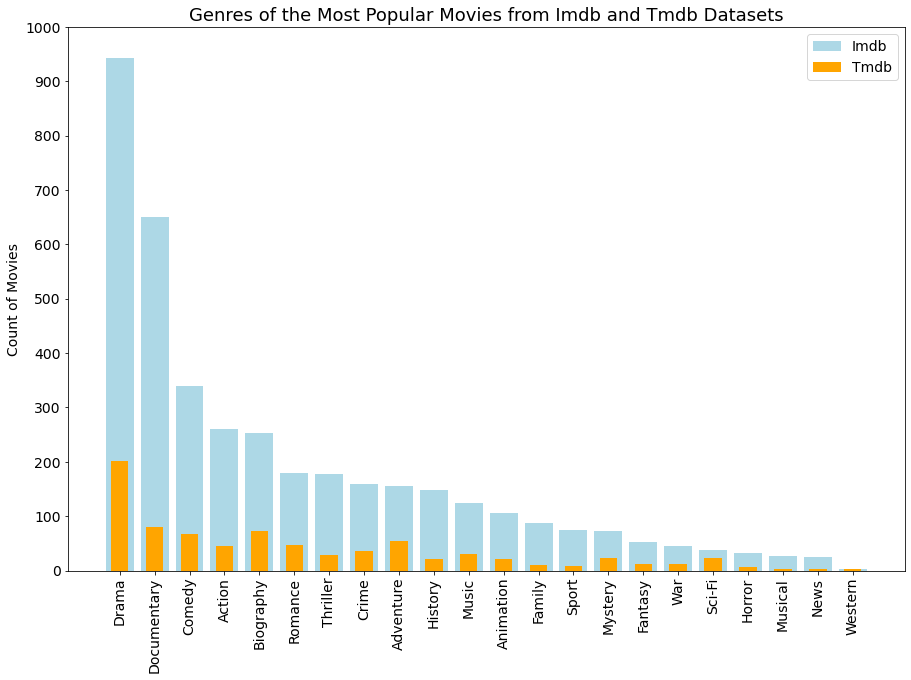

In [96]:
genre_count_fig, ax = plt.subplots(figsize=(15, 10))
width = 0.5
ax.bar(imdb_genre_count_dict.keys(), imdb_genre_count_dict.values(), label="Imdb", color="lightblue")
ax.bar(tmdb_genre_count_dict.keys(), tmdb_genre_count_dict.values(), width, label="Tmdb", color="orange")
ax.tick_params("x", labelrotation=90, labelsize=14)
ax.tick_params("y", labelsize=14)
ax.set_yticks(np.linspace(0, 1000, 11))
ax.set_ylabel("Count of Movies", fontsize=14)
ax.set_title("Genres of the Most Popular Movies from Imdb and Tmdb Datasets", fontsize=18)
ax.legend(fontsize=14);

We can see that Drama, Documentary, Biography and Comedy have the highest popularity across both Imdb and Tmdb datasets.